**D1DAE: Análise Estatística para Ciência de Dados** <br/>
IFSP Campinas

Prof: Samuel Martins <br/><br/>

<a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/"><img alt="Creative Commons License" style="border-width:0" src="https://i.creativecommons.org/l/by-nc-sa/4.0/88x31.png" /></a><br />This work is licensed under a <a rel="license" href="http://creativecommons.org/licenses/by-nc-sa/4.0/">Creative Commons Attribution-NonCommercial-ShareAlike 4.0 International License</a>.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
sns.set_theme(style="whitegrid")

params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
plt.rcParams.update(params)

# <font color='#0C509E' style='font-size: 40px;'>Linea Regression - Multiple variables</font>

## 1. Exploring the Data

This is a dummy dataset that pesents data from fake startus from New York, California, and Florida.

**Dataset:** https://www.kaggle.com/farhanmd29/50-startups

### 1.1. Importing the Dataset

In [3]:
df = pd.read_csv('./datasets/50_Startups.csv')

In [4]:
df.head()

,R&D Spend,Administration,Marketing Spend,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [5]:
# renaming some columns
df.rename(columns={'R&D Spend': 'R&D',
                   'Marketing Spend': 'Marketing'}, inplace=True)

In [6]:
df.head()

,R&D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


### 1.2. Basic Information about the Dataset

In [7]:
print(f'This dataset has {df.shape[0]} observations/samples/rows and {df.shape[1]} attributes/features/colunas')

This dataset has 50 observations/samples/rows and 5 attributes/features/colunas


In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50 entries, 0 to 49
Data columns (total 5 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   R&D             50 non-null     float64
 1   Administration  50 non-null     float64
 2   Marketing       50 non-null     float64
 3   State           50 non-null     object 
 4   Profit          50 non-null     float64
dtypes: float64(4), object(1)
memory usage: 2.1+ KB


<br/>**"Profit"** is a _dependent variable_ and the others are _independent variables_.

## 2. Analyzing the states (Categorical Variable)

### 2.1. Proportion of samples per state

In [9]:
# absolute
df.groupby('State').size()

State
California    17
Florida       16
New York      17
dtype: int64

In [10]:
# percentage
df.groupby('State').size() / df.shape[0]

State
California    0.34
Florida       0.32
New York      0.34
dtype: float64

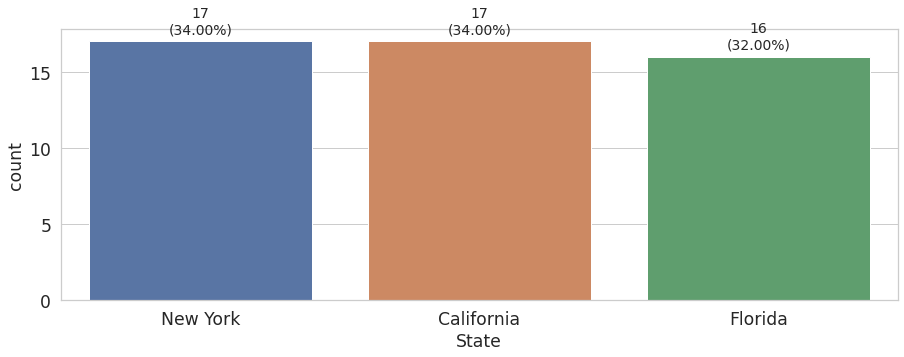

In [11]:
ax = sns.countplot(data=df, x='State')

n_registros = df.shape[0]

for bar in ax.patches:
    freq = bar.get_height()
    ax.annotate(f'{freq}\n({(freq * 100) / n_registros:.2f}%)',  # string a ser impressa
                (bar.get_x() + bar.get_width() / 2, bar.get_height()),  # posição inicial a ser impressa (x, y)
                ha='center', va='center',
                size=14, xytext=(0, 20),
                textcoords='offset points')

### 2.2. Mean profit (and standard deviation) per State

In [12]:
df.groupby('State')['Profit'].describe().round(2)

,count,mean,std,min,25%,50%,75%,max
State,,,,,,,,
California,17.0,103905.18,44446.36,14681.40,78239.91,97427.84,134307.35,191792.06
Florida,16.0,118774.02,35605.47,49490.75,99147.92,109543.12,142719.63,191050.39
New York,17.0,113756.45,41140.26,35673.41,96479.51,108552.04,129917.04,192261.83


<AxesSubplot:xlabel='State', ylabel='Profit'>

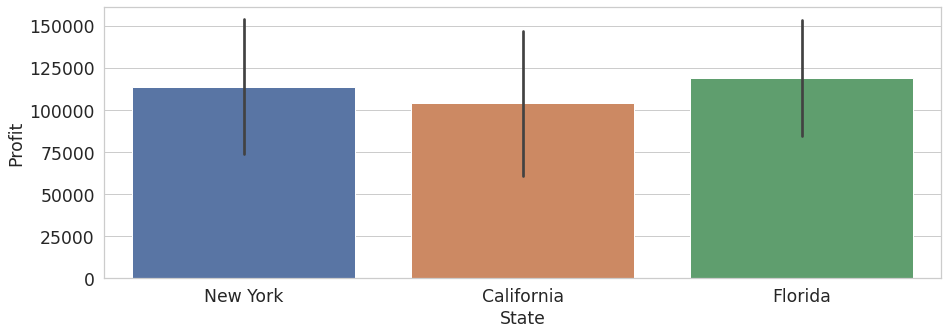

In [13]:
sns.barplot(data=df, x='State', y='Profit', ci='sd')

### 2.3. Distribution of Profits per State

<AxesSubplot:xlabel='Profit', ylabel='State'>

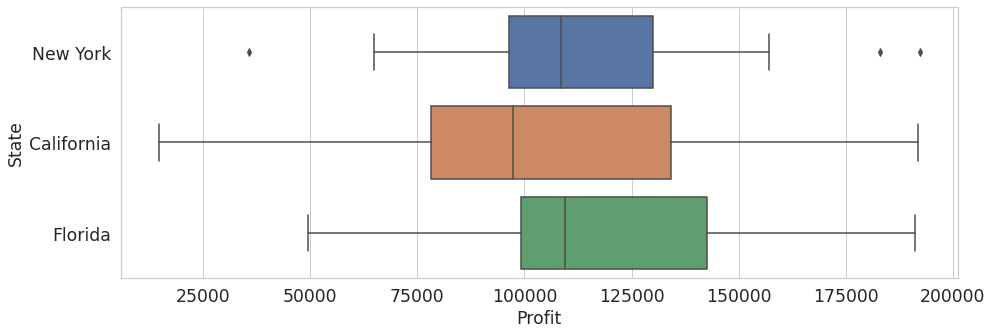

In [14]:
sns.boxplot(data=df, x='Profit', y='State')

### 2.4. Correlation matrix

In [15]:
df.corr()

,R&D,Administration,Marketing,Profit
R&D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


<br/>Note that the correlation between **Profit** and investments in **R&D** is quite high. On a smaller scale, the correlation between **Profit** and investments in **Marketing** is also expressive.

#### Correlation per State

In [16]:
df.groupby('State').corr()

R&D  Administration  Marketing    Profit
State                                                                   
California R&D             1.000000        0.193109   0.742708  0.975064
           Administration  0.193109        1.000000  -0.090714  0.161666
           Marketing       0.742708       -0.090714   1.000000  0.794036
           Profit          0.975064        0.161666   0.794036  1.000000
Florida    R&D             1.000000        0.053469   0.545440  0.970117
           Administration  0.053469        1.000000  -0.353783 -0.041762
           Marketing       0.545440       -0.353783   1.000000  0.569445
           Profit          0.970117       -0.041762   0.569445  1.000000
New York   R&D             1.000000        0.406806   0.803902  0.976410
           Administration  0.406806        1.000000   0.144562  0.398472
           Marketing       0.803902        0.144562   1.000000  0.810238
           Profit          0.976410        0.398472   0.810238  1.000000

<br/>

The correlation between **Profit** and investments in **R&D** is very high for _all_ states.<br/>
The correlation between **Profit** and investments in **Administration** is not expressive, being close to zero, which suggests that such variables are not correlated.<br/>
The correlation between **Profit** and investments in **Marketing** is considerably high in _all_ states.<br/>

<br/>

The correlation between **Profit** and investments in **R&D** is also very high in _Florida_.<br/>
The correlation between **Profit** and investments in **Administration** is not expressive, being close to zero, which suggests that such variables are not correlated.<br/>
The correlation between **Profit** and investments in **Marketing** is lower than in _California_, but still indicates a certain correlation between the two variables.<br/>

<br/>

Unlike _California_ and _Florida_, investments in **Admnistration** seem to have a certain influence on the **Profit** of NY companies, since the correlation of such variables is "relatively" expressive.<br/>

### 2.5 Dependent Variable (y) vs Independent Variables

## `pairplot`

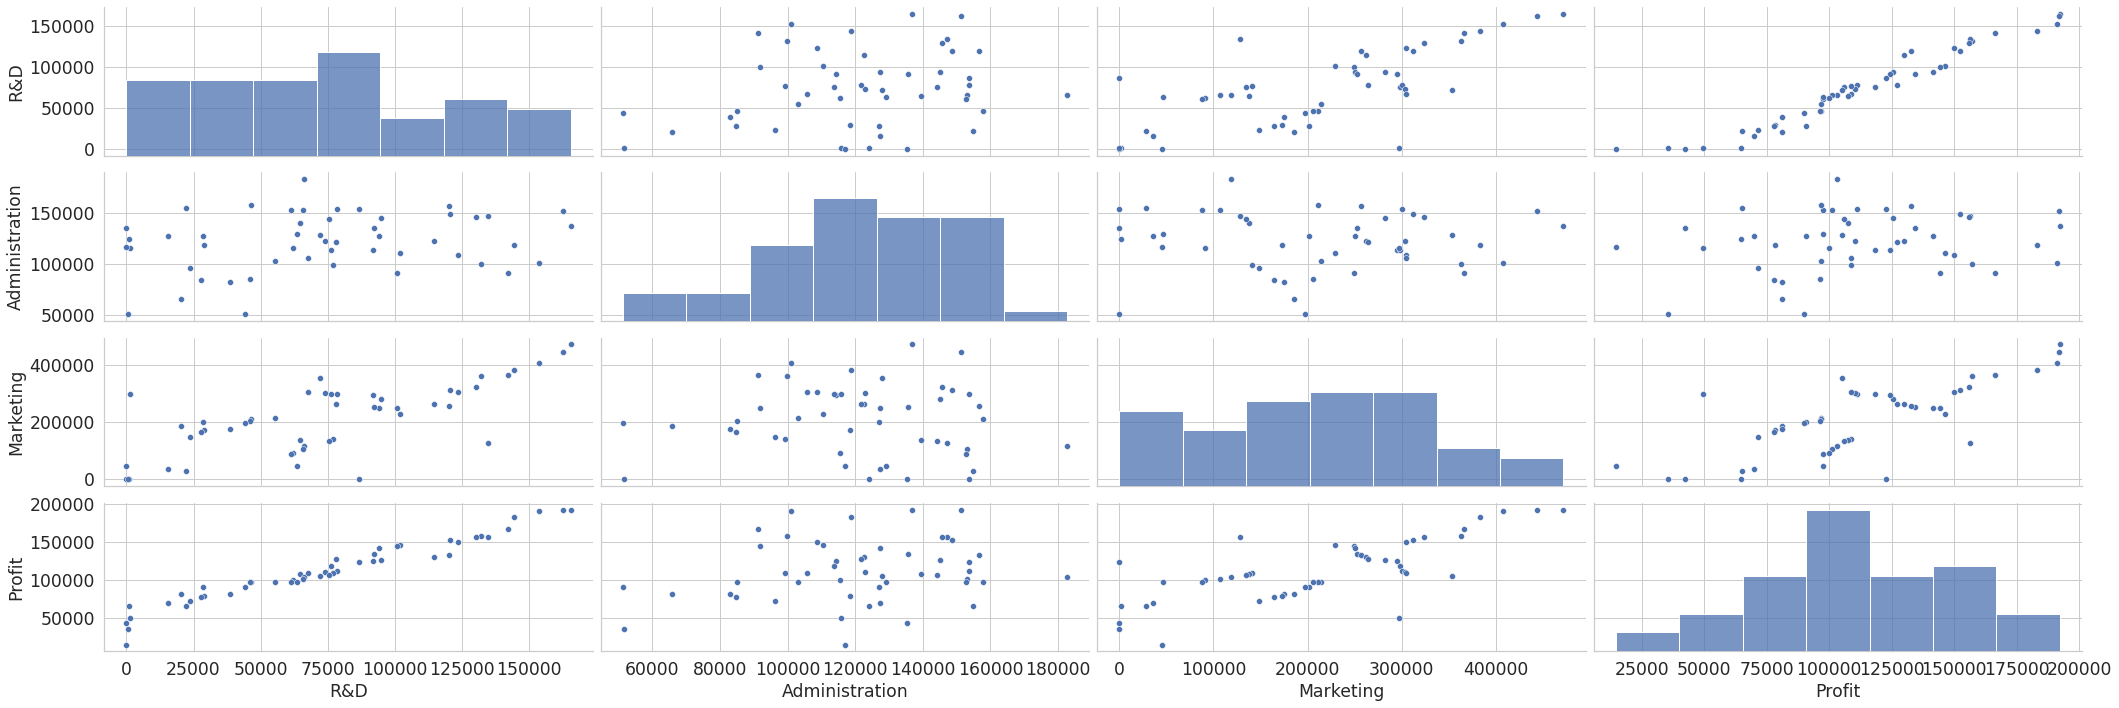

In [17]:
sns.pairplot(df, aspect=3)

**NB:** Feel free to test `jointplot` and `lmplot`.

### 2.6. Visualizing the Dependent Variable and 2 Independent Variables

In [18]:
df.corr()

,R&D,Administration,Marketing,Profit
R&D,1.000000,0.241955,0.724248,0.972900
Administration,0.241955,1.000000,-0.032154,0.200717
Marketing,0.724248,-0.032154,1.000000,0.747766
Profit,0.972900,0.200717,0.747766,1.000000


In [19]:
# pip install plotly
# jupyter labextension install jupyterlab-plotly

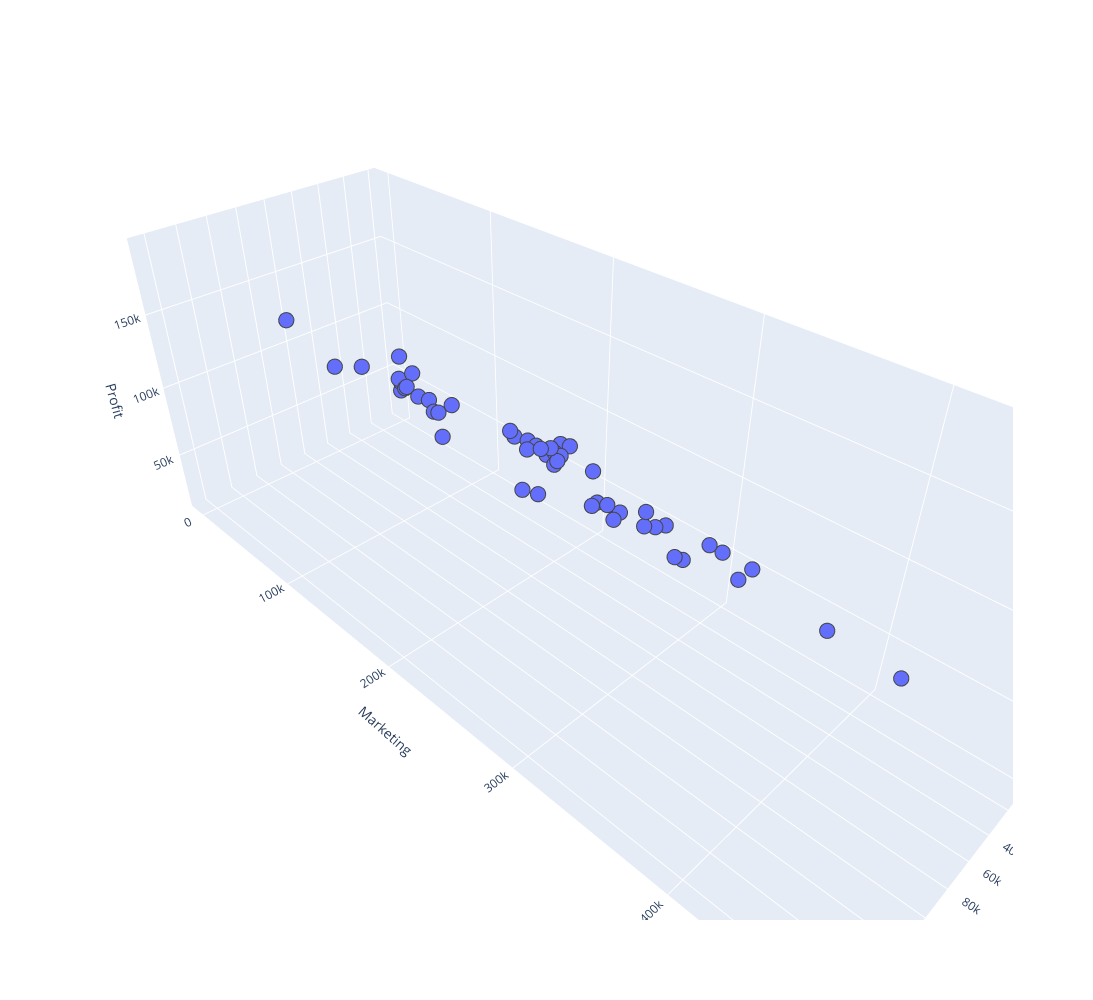

In [21]:
import plotly.express as px

fig = px.scatter_3d(df, x='R&D', y='Marketing', z='Profit', width=1000, height=1000)
fig.update_traces(marker=dict(size=5, line=dict(width=1)), selector=dict(mode='markers'))
fig.show()

## 3. Linear Regression

### 3.1. Transforming Categorical Variables into _Dummy_ Variables
https://pandas.pydata.org/docs/reference/api/pandas.get_dummies.html

In [22]:
df.head()

,R&D,Administration,Marketing,State,Profit
0,165349.20,136897.80,471784.10,New York,192261.83
1,162597.70,151377.59,443898.53,California,191792.06
2,153441.51,101145.55,407934.54,Florida,191050.39
3,144372.41,118671.85,383199.62,New York,182901.99
4,142107.34,91391.77,366168.42,Florida,166187.94


In [23]:
df_pre = pd.get_dummies(data=df, columns=['State'])

In [24]:
df_pre.head()

,R&D,Administration,Marketing,Profit,State_California,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,0,1
1,162597.70,151377.59,443898.53,191792.06,1,0,0
2,153441.51,101145.55,407934.54,191050.39,0,1,0
3,144372.41,118671.85,383199.62,182901.99,0,0,1
4,142107.34,91391.77,366168.42,166187.94,0,1,0


### Alternative: OneHotEncoder
https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.OneHotEncoder.html

##### Differences

1. By using **_OneHotEnconder_**, we can create a _function/model_ to create the **dummy variables** from our **training set**. We can then apply such a model to new data without any problem.

2. By using **_OneHotEncoder_**, if the **test set** has values **NOT** seen in the **training set** for the _categorical variable_ to be turned into **dummy**, we can inform the action we wish to take. Just pass the parameter: `handle_unknown{'error', 'ignore'}`. This is extremely interesting when we already have models trained in production, so unsupported values must be identified before using the model.

3. For ***get_dummies()***, we need to have _all_ the **training and testing** data in the _same table_, in order to maintain _consistency_ of the dummy variables
- E.g: the _California_State_ column should come **before**_ Florida_State_, and_ New York_State_.

4. However, (3) limits its use in _PRODUCTION_, with models _already trained_ for a given set of categorical values, requiring **retraining**  model for every _new test set_.

5. Also, when using the **test data** to find out the categories (or anything else during the _training stage_), we get the **data snooping bias**.

In general, prefer **_OneHotEnconder_** to ***get_dummies()***. For simplicity, we will use ***get_dummies()**.

Source: https://stackoverflow.com/questions/36631163/what-are-the-pros-and-cons-between-get-dummies-pandas-and-onehotencoder-sciki

### 3.2. Avoiding the Dummy Variable Trap

In [25]:
df_final = df_pre.drop(columns=['State_New York'])

In [26]:
df_final.head()

,R&D,Administration,Marketing,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [27]:
### ALTERNATIVELY
pd.get_dummies(data=df, columns=['State'], drop_first=True)

,R&D,Administration,Marketing,Profit,State_Florida,State_New York
0,165349.20,136897.80,471784.10,192261.83,0,1
1,162597.70,151377.59,443898.53,191792.06,0,0
2,153441.51,101145.55,407934.54,191050.39,1,0
3,144372.41,118671.85,383199.62,182901.99,0,1
4,142107.34,91391.77,366168.42,166187.94,1,0
5,131876.90,99814.71,362861.36,156991.12,0,1
6,134615.46,147198.87,127716.82,156122.51,0,0
7,130298.13,145530.06,323876.68,155752.60,1,0
8,120542.52,148718.95,311613.29,152211.77,0,1
9,123334.88,108679.17,304981.62,149759.96,0,0


### 3.3. Extracting the independent and dependent variables

In [28]:
df_final.head()

,R&D,Administration,Marketing,Profit,State_California,State_Florida
0,165349.20,136897.80,471784.10,192261.83,0,0
1,162597.70,151377.59,443898.53,191792.06,1,0
2,153441.51,101145.55,407934.54,191050.39,0,1
3,144372.41,118671.85,383199.62,182901.99,0,0
4,142107.34,91391.77,366168.42,166187.94,0,1


In [30]:
df_final.columns

Index(['R&D', 'Administration', 'Marketing', 'Profit', 'State_California',
       'State_Florida'],
      dtype='object')

#### Creating a DataFrame to store the independent/explanatory variables (X)

In [31]:
indep_vars = ['R&D', 'Administration', 'Marketing', 'State_California', 'State_Florida']
indep_vars

['R&D', 'Administration', 'Marketing', 'State_California', 'State_Florida']

In [32]:
X = df_final[indep_vars]
X.head()

,R&D,Administration,Marketing,State_California,State_Florida
0,165349.20,136897.80,471784.10,0,0
1,162597.70,151377.59,443898.53,1,0
2,153441.51,101145.55,407934.54,0,1
3,144372.41,118671.85,383199.62,0,0
4,142107.34,91391.77,366168.42,0,1


#### Creating a Series to store the dependent variable (y)

In [33]:
y = df_final['Profit']
y.head()

0    192261.83
1    191792.06
2    191050.39
3    182901.99
4    166187.94
Name: Profit, dtype: float64

### 3.4. Splitting the dataset into Training Set and Test Set¶

In [34]:
from sklearn.model_selection import train_test_split

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### 3.5. Checking training and test set sizes

In [36]:
print(f'X_train.shape = {X_train.shape}, y_train.shape = {y_train.shape}')

X_train.shape = (40, 5), y_train.shape = (40,)


In [37]:
print(f'X_test.shape = {X_test.shape}, y_test.shape = {y_test.shape}')

X_test.shape = (10, 5), y_test.shape = (10,)


### 3.6. Training the Linear Regression Model with the Training Set

In [38]:
from sklearn.linear_model import LinearRegression

In [39]:
reg = LinearRegression()

In [40]:
reg.fit(X_train, y_train)

LinearRegression()

### 3.7. Coefficient of determination (R²) of the linear model estimated with the Training Se

In [41]:
print(f'R² = {reg.score(X_train, y_train)}')

R² = 0.9537019995248526


### 3.8 Visual Analysis

#### **Prediction vs Real/True**

In [42]:
y_train_pred = reg.predict(X_train)

Text(0.5, 1.0, 'Profit - Prediction vs Real')

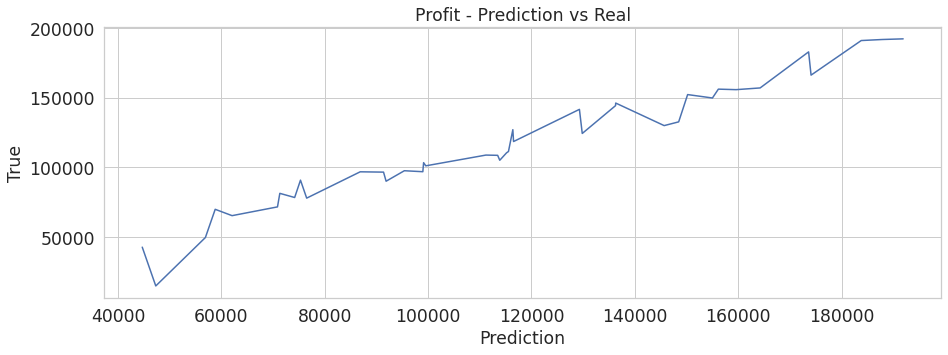

In [43]:
sns.lineplot(x=y_train_pred, y=y_train)
plt.xlabel('Prediction')
plt.ylabel('True')
plt.title('Profit - Prediction vs Real')

**NB**: A **perfect prediction*** for the entire dataset (no errors) would result in a **straight line** with a _45 degree angle_.

#### **Residual Analysis**
Plot of Prediction vs Residual. This analysis is interesting because we can detect if we meet the assumption of **homoscedasticity.**

<img src='imgs/residual-analysis.png' width=600 />

In [46]:
residual_train = y_train - y_train_pred 

Text(0.5, 1.0, 'Profit - Prediction vs Residual')

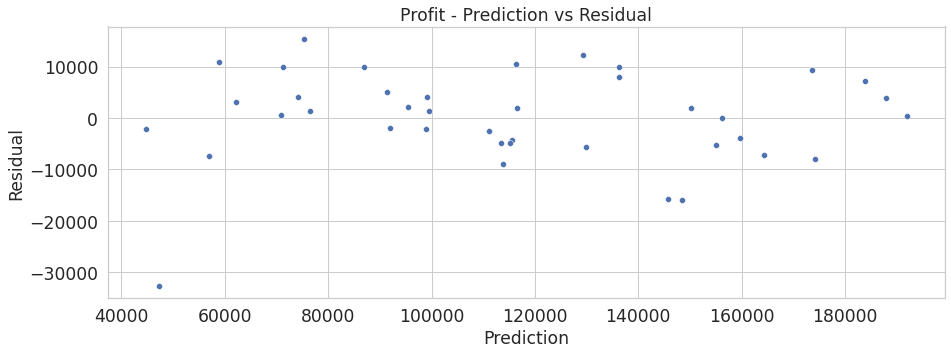

In [47]:
sns.scatterplot(x=y_train_pred, y=residual_train)
plt.xlabel('Prediction')
plt.ylabel('Residual')
plt.title('Profit - Prediction vs Residual')

The model seems to meet the **homoscedasticity**.

## 4. Predicting Profits for Test Samples/Examples

In [48]:
X_test.head()

,R&D,Administration,Marketing,State_California,State_Florida
13,91992.39,135495.07,252664.93,1,0
39,38558.51,82982.09,174999.30,1,0
30,61994.48,115641.28,91131.24,0,1
45,1000.23,124153.04,1903.93,0,0
17,94657.16,145077.58,282574.31,0,0


In [49]:
y_pred = reg.predict(X_test)

In [50]:
y_pred

array([126362.87908254,  84608.45383635,  99677.49425148,  46357.46068582,
       128750.48288503,  50912.41741885, 109741.35032702, 100643.24281646,
        97599.27574595, 113097.42524433])

## 5. Computing Evaluation Metrics
How much do the predictions obtained differ from the actual data?

### Mean Absolute Error (MAE)

In [52]:
from sklearn.metrics import mean_absolute_error

In [53]:
mae = mean_absolute_error(y_test, y_pred)

In [54]:
mae

6961.477813256679

### Mean Squared Error (MSE)

In [55]:
from sklearn.metrics import mean_squared_error

In [56]:
mse = mean_squared_error(y_test, y_pred)
mse

82010363.04443316

### Root Mean Squared Error (RMSE)

In [57]:
rmse = mean_squared_error(y_test, y_pred, squared=False)
rmse

9055.957323465762

## 6. Interpretation of the Estimated Parameters

<img src="imgs/coefficients.png" width=700/>

### 6.1. Intercept
The model's **intercept** represents the _effect_ on $y$ (Profit) if _all independent variables_ are **zero**.

As $x_4=x_5=0$, this scenario consists of the State of _New York_. Therefore, the _regression coefficient_ for _New York_ will be included in the **intercept** (we'll see more soon).

In [58]:
reg.intercept_

54035.02735368938

### 6.2. Regression coefficients
The **(hyperplane) regression coefficients** $\theta_1$, $\theta_2$, $\theta_3$, $\theta_4$, and $\theta_5$ are known as **partial regression coefficients** or **partial angular coefficients**. In other words:
- $\theta_1$ measures the change in the value of $y$ (Profit), per unit of change in $x_1$ (R&D), keeping the values of $x_2$ (Administration), $x_3$ (Marketing), $x_4$ (California) and $x_5$ (Florida) constants.

It gives us the _"direct" effect_ of a unit of change in $x_1$ on the average value of $y$, excluding the effects that the other independent variables may have on $y$.

We can use the same idea to interpret the other coefficients.

In [59]:
reg.coef_

array([ 8.05630064e-01, -6.87878823e-02,  2.98554429e-02, -6.98775997e+00,
        9.31805246e+02])

In [60]:
X_train.columns

Index(['R&D', 'Administration', 'Marketing', 'State_California',
       'State_Florida'],
      dtype='object')

In [63]:
coefficients = pd.DataFrame({
    'feature name': X_train.columns,
    'coefficients': reg.coef_
})

In [64]:
coefficients

,feature name,coefficients
0,R&D,0.805630
1,Administration,-0.068788
2,Marketing,0.029855
3,State_California,-6.987760
4,State_Florida,931.805246


### 6.3. Interpretation of Estimated Parameters

#### **Intercept → Excluding the effect of _independent variables_ ($x_1=x_2=x_3=x_4=x_5=0$)**

The effect on _profits_ is  **\$54,035.02**.

Recall that the _State_ is _New Work_ when $x_4=x_5=0$. Thus, the **regression coefficient** for _New York_ is included in this **intercept**.

If we had _more_ categorical variables that were transformed into _dummy_ variables (e.g., sector), **all** _dummy_ variables excluded from the table have their regression coefficients included in the **intercept**.

##### **R&D ($x_1$)**
Freezing the values of the other _independent variables_, the addition of **$1.0 of investment in R&D** increases the profit by **\$ 0.805630**.

##### **Administration ($x_2$)**
Freezing the values of the other _independent variables_, the addition of **$1.0 of investment in Administration** decreases the profit by **-\$ 0.068788**.

##### **Marketing ($x_3$)**
Freezing the values of the other _independent variables_, the addition of **$1.0 of investment in Marketing* increases the profit by **\$ 0.029855**.

##### **Startups in California ($x_4$)**
Freezing the values of the other _independent variables_, being located in _California_ decreases the profit by **-\$ 6.987760**.

##### **Startups in Florida ($x_5$)**
Freezing the values of the other _independent variables_, being located in _Florida_ increases the profit by **\$ 931.80**.

##### **Startups in New York ($x_4=x_5=0$)**
The effect in the profit caused by being located in _New York_ is included in the **intercept**.

## 8. Does `sklearn`'s `LinearRegression` already handle the Dummy Variable Trap?

There is no a clear mentioin about this in the [official docummentation](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LinearRegression.html). <br/>
However, experiments lead us to beleve that `LinearRegression` solves this problem internally.

Do the following experiment:
- Repeat the same previous steps but considering all dummy variables (the column _State\_New York must be considered).
- Train the model, make the predictions, and compare the results of this linear regression with the previous one.

## 9. Exercise

Choose another set of _independent varables_ (e.g., ignore the _Marketing_ column), repeat the experiments, and compare the results with the model that uses _all variables_.